In [1]:
import numpy as np
import scipy.io as sio
import sklearn.metrics as metrics
from skimage.feature import hog
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

from fea_util import *
from func_LMFilter import *

In [2]:
#Loading the data
train_data, train_label, test_data, test_label = get_data()

In [3]:
train_data[0].shape

(64, 64)

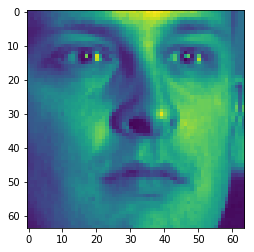

In [4]:
implot = plt.imshow(train_data[10000])

In [5]:
# set parameters for the L-M Bank filters
# support
sup=49 #resolution

# create a matrix [49,49,48] representing the fitlers. 
print('creating filter bank...')
F = makeLMfilters(sup)

creating filter bank...


In [6]:
F.shape

(49, 49, 48)

In [7]:
F[:,:,0]

array([[ 1.03689080e-70,  3.82585579e-70,  1.33535488e-69, ...,
         1.33535488e-69,  3.82585579e-70,  1.03689080e-70],
       [ 1.25953366e-65,  4.64734970e-65,  1.62208443e-64, ...,
         1.62208443e-64,  4.64734970e-65,  1.25953366e-65],
       [ 9.26227232e-61,  3.41753617e-60,  1.19283733e-59, ...,
         1.19283733e-59,  3.41753617e-60,  9.26227232e-61],
       ...,
       [-9.26227232e-61, -3.41753617e-60, -1.19283733e-59, ...,
        -1.19283733e-59, -3.41753617e-60, -9.26227232e-61],
       [-1.25953366e-65, -4.64734970e-65, -1.62208443e-64, ...,
        -1.62208443e-64, -4.64734970e-65, -1.25953366e-65],
       [-1.03689080e-70, -3.82585579e-70, -1.33535488e-69, ...,
        -1.33535488e-69, -3.82585579e-70, -1.03689080e-70]])

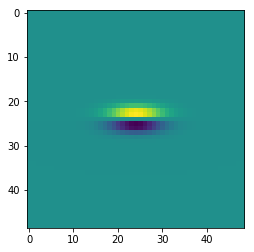

In [8]:
#Looking at one of the filter
plt.imshow(F[:,:,0])

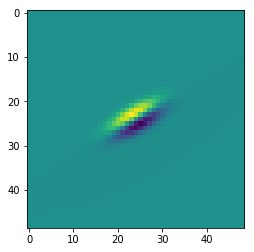

In [9]:
plt.imshow(F[:,:,1])

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


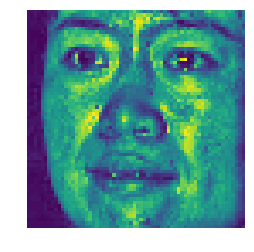

In [10]:
# Adjust the contrast of the images by applyting Histogram Equalization
from skimage import exposure
img=train_data[9]
image_equalized = exposure.equalize_adapthist(img/np.max(np.abs(img)), clip_limit=0.03)
plt.imshow(image_equalized)
plt.axis('off')
plt.show()

[[32 45 40 ... 46 41 47]
 [29 44 30 ... 45 40 51]
 [14 40 46 ... 44 43 48]
 ...
 [10 11 11 ... 62 60 65]
 [15 17 16 ... 66 64 68]
 [19 21 23 ... 78 66 68]]


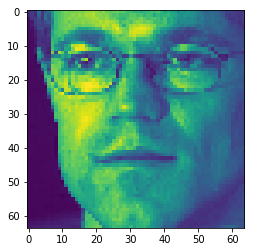

In [11]:
# Converting the image to a grayscale
from skimage import io, color
img=train_data[200]
print(img)
img=color.rgb2gray(img)
plt.imshow(img)

In [ ]:
# As 64x64 size image to convolve with 49x49, there is a padding required of 24x24
def convolve2d_test_pad(image, filter_):
    '''
    input args:
        image: a numpy array of size [image height, image width]
        filter_: a numpy array of filter size [filter hieght, filter width] [49, 49]
    output: convolved output
    '''
    output=np.zeros(image.shape)
    filter_ = np.flipud(np.fliplr(filter_))    # Flip the kernel
    shift=len(filter_[0])-1
    # Adding zero padding for the input image
    image_padded = np.zeros((image.shape[0]+shift, image.shape[1]+shift))
    image_padded[int(shift/2):-int(shift/2), int(shift/2):-int(shift/2)] =image
    
    #Looping over every pixel
    for col in range(image.shape[1]):
        for row in range(image.shape[0]):
            output[col][row]=(np.sum(np.multiply(image_padded[col:col+len(filter_[0]), row:row+len(filter_[0])], filter_)))
    return output

In [ ]:
# Let's check the convolution now
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_convolve_test=convolve2d_test_pad(train_data[200], F[:,:,0])
print("shape of the Convolved image",image_convolve_test.shape)
#print(image_convolve_test)
plt.imshow(image_convolve_test)
plt.axis('off')
plt.show()
#image_convolve_test=convolve2d_test(train_data[200], kernel)

In [ ]:
import scipy
img_new=scipy.signal.convolve2d(train_data[200], F[:,:,0], 'same')
print(img_new)
plt.imshow(img_new)
plt.axis('off')
plt.show()

### Lets use the fea_util.py Now to calculate the Vector of Filter responses
+ Get the final vector

In [12]:
print('extracting filter responses')
train_filter_feature, test_filter_feature = get_filter_feature(train_data[0:10], test_data[0:10], F)

extracting filter responses


In [13]:
print(len(train_filter_feature), len(test_filter_feature))
print(len(train_filter_feature[0]), len(test_filter_feature[0]))

10 10
48 48


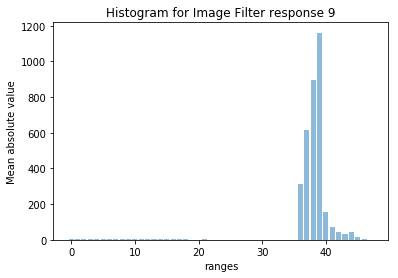

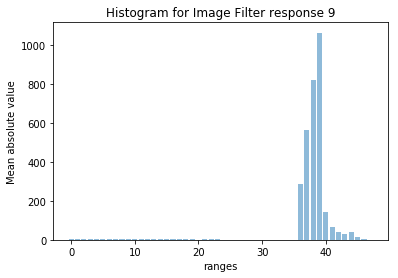

In [14]:
ranges=[i for i in range(48)]
plt.bar(ranges, train_filter_feature[9], align='center', alpha=0.5)
plt.ylabel('Mean absolute value')
plt.xlabel('ranges')
plt.title('Histogram for Image Filter response {}'.format(9))
plt.show()


ranges=[i for i in range(48)]
plt.bar(ranges, test_filter_feature[9], align='center', alpha=0.5)
plt.ylabel('Mean absolute value')
plt.xlabel('ranges')
plt.title('Histogram for Image Filter response {}'.format(9))
plt.show()